# Under Sampling

In [4]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from pylab import rcParams
from collections import Counter
from imblearn.under_sampling import NearMiss
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Delay"]

In [5]:
data = pd.read_csv('/Users/msml/Vamsi/SF/SF_Projects/FINAL.csv')
data

,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,OriginAirportID,DestAirportID,ArrTime,...,pressure_y,cloudcover_y,DewPointF_y,WindGustMiles_y,tempF_y,WindChillF_y,humidity_y,Date,Airport_x,Airport_y
0,3.0,2017.0,8.0,25.0,1000.0,0.0,1015.0,11292.0,11057.0,1500.0,...,1018.0,0.0,43.0,9.0,62.0,63.0,49.0,2017-08-25,CLT,DEN
1,3.0,2017.0,8.0,25.0,1600.0,0.0,1615.0,11618.0,13204.0,1800.0,...,1016.0,93.0,67.0,14.0,88.0,87.0,51.0,2017-08-25,MCO,EWR
2,3.0,2017.0,8.0,25.0,1900.0,0.0,1944.0,14771.0,12889.0,2100.0,...,1012.0,70.0,54.0,12.0,63.0,62.0,78.0,2017-08-25,LAS,SFO
3,3.0,2017.0,8.0,25.0,1600.0,0.0,1625.0,11298.0,14771.0,1700.0,...,1015.0,56.0,67.0,11.0,89.0,90.0,34.0,2017-08-25,SFO,DFW
4,3.0,2017.0,8.0,25.0,1100.0,1.0,1040.0,14771.0,10397.0,1900.0,...,1014.0,73.0,55.0,8.0,62.0,62.0,79.0,2017-08-25,ATL,SFO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1850155,2.0,2016.0,5.0,20.0,1100.0,0.0,1130.0,14747.0,11292.0,1500.0,...,1010.0,20.0,44.0,6.0,58.0,58.0,60.0,2016-05-20,DEN,SEA
1850156,2.0,2016.0,5.0,20.0,1300.0,0.0,1350.0,10397.0,14107.0,1400.0,...,1019.0,100.0,62.0,13.0,66.0,66.0,88.0,2016-05-20,PHX,ATL
1850157,2.0,2016.0,5.0,20.0,1500.0,0.0,1550.0,14107.0,10397.0,2200.0,...,1006.0,0.0,35.0,15.0,95.0,94.0,13.0,2016-05-20,ATL,PHX
1850158,2.0,2016.0,5.0,20.0,1700.0,0.0,1734.0,11292.0,12266.0,2000.0,...,1004.0,100.0,51.0,9.0,72.0,72.0,50.0,2016-05-20,IAH,DEN


In [ ]:
data.isnull().values.any()

In [8]:
#Create independent and Dependent Features
labels = np.asarray(data["ArrDel15"])
data_select = data.drop(["Quarter", "Year","ArrTime", "DepTime", "Month", "DayofMonth","DepDel15", "Date", "Airport_y","Airport_x"],axis=1)
lenc = LabelEncoder()
intenc = lenc.fit_transform(data_select["DestAirportID"])
data_select["DestAirportID"] = intenc
intenc = lenc.fit_transform(data_select["OriginAirportID"])
data_select["OriginAirportID"] = intenc
features = np.asarray(data_select)

In [9]:
features_train, features_test, labels_train, labels_test = train_test_split(features,labels, test_size=0.20, random_state=32)

In [10]:
state = np.random.RandomState(42)
X = features_train
Y = labels_train
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(1480128, 31)
(1480128,)


Text(0, 0.5, 'Frequency')

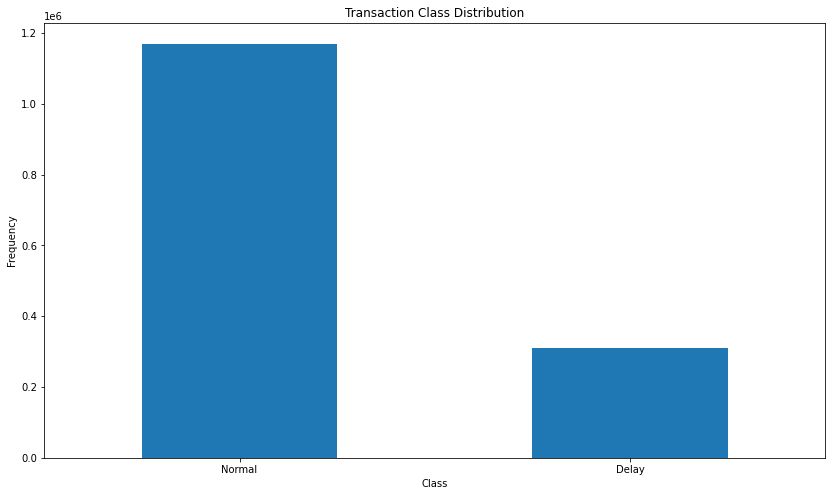

In [11]:
count_classes = pd.value_counts(labels_train, sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [12]:
## Get the delay and the normal dataset 
delay = [(i) for i in labels_train if i==1]
normal = [(i) for i in labels_train if i==0]
print(len(delay),len(normal))

310210 1169918


In [13]:
# Implementing Undersampling for Handling Imbalanced 
nm = NearMiss()
X_res,y_res=nm.fit_sample(X,Y)

In [14]:
X_res.shape,y_res.shape

((620420, 31), (620420,))

In [15]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0.0: 1169918, 1.0: 310210})
Resampled dataset shape Counter({0.0: 310210, 1.0: 310210})


In [16]:
df=pd.DataFrame(X_res)
df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,1532.0,8.0,7.0,1640.0,0.0,10.0,0.0,19.0,195.0,113.0,...,119.0,0.1,10.0,1013.0,65.0,65.0,10.0,73.0,72.0,82.0
1,1245.0,8.0,7.0,1402.0,0.0,12.0,1.0,10.0,155.0,113.0,...,116.0,0.0,10.0,1017.0,62.0,62.0,7.0,73.0,70.0,78.0
2,700.0,8.0,14.0,828.0,0.0,11.0,0.0,12.0,261.0,266.0,...,143.0,0.1,5.0,1012.0,76.0,65.0,3.0,68.0,67.0,94.0
3,2045.0,14.0,8.0,2210.0,0.0,14.0,0.0,9.0,223.0,113.0,...,113.0,0.0,10.0,1011.0,26.0,53.0,11.0,67.0,66.0,76.0
4,1840.0,14.0,8.0,2012.0,0.0,11.0,0.0,14.0,243.0,119.0,...,119.0,0.0,10.0,1018.0,76.0,54.0,19.0,62.0,61.0,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620415,2100.0,14.0,12.0,2356.0,1.0,41.0,51.0,18.0,80.0,116.0,...,122.0,0.0,10.0,1015.0,93.0,42.0,15.0,50.0,46.0,73.0
620416,800.0,12.0,13.0,1053.0,1.0,72.0,55.0,8.0,234.0,266.0,...,119.0,0.0,10.0,1011.0,58.0,57.0,6.0,93.0,92.0,29.0
620417,1726.0,0.0,11.0,1849.0,1.0,15.0,36.0,14.0,36.0,113.0,...,200.0,0.4,9.0,1008.0,70.0,69.0,14.0,93.0,92.0,50.0
620418,1935.0,11.0,4.0,2249.0,1.0,31.0,40.0,8.0,155.0,116.0,...,113.0,0.0,10.0,1011.0,2.0,73.0,18.0,86.0,86.0,66.0


In [39]:
xrun=pd.DataFrame(X_res)
yrun=pd.DataFrame(y_res)
xrun.to_csv("X_run.csv", index=False)
yrun.to_csv("y_run.csv", index=True)

In [17]:
xrun=pd.DataFrame(X_res)
yrun=pd.DataFrame(y_res)
xrun.to_csv("X_reg_un.csv", index=False)
yrun.to_csv("y_reg_un.csv", index=True)

Text(0, 0.5, 'Frequency')

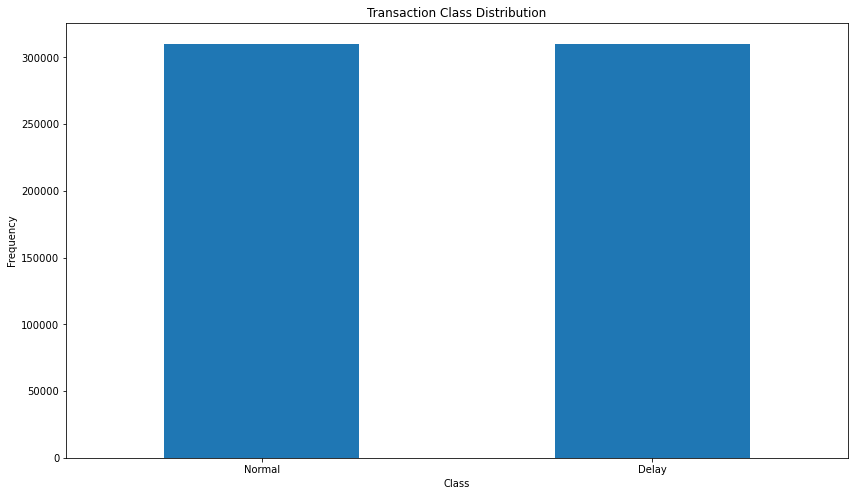

In [24]:
count_classes = pd.value_counts(y_res, sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

# Over Sampling

In [25]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTETomek
from pylab import rcParams
from collections import Counter
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Delay"]

In [26]:
data = pd.read_csv('/Users/msml/Vamsi/SF/SF_Projects/FINAL.csv')
#data["ArrDel15"].unique()

In [27]:
#Create independent and Dependent Features
labels = np.asarray(data["ArrDel15"])
data_select = data.drop(["Quarter", "Year","ArrTime", "DepTime", "Month", "DayofMonth","DepDel15", "Date", "Airport_y","Airport_x"],axis=1)
lenc = LabelEncoder()
intenc = lenc.fit_transform(data_select["DestAirportID"])
data_select["DestAirportID"] = intenc
intenc = lenc.fit_transform(data_select["OriginAirportID"])
data_select["OriginAirportID"] = intenc
features = np.asarray(data_select)

In [28]:
features_train, features_test, labels_train, labels_test = train_test_split(features,labels, test_size=0.20, random_state=32)

In [29]:
state = np.random.RandomState(42)
X = features_train
Y = labels_train
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(1480128, 31)
(1480128,)


In [30]:
np.unique(labels,return_counts=True)

(array([0., 1.]), array([1462525,  387635]))

In [31]:
np.unique(labels_train)

array([0., 1.])

Text(0, 0.5, 'Frequency')

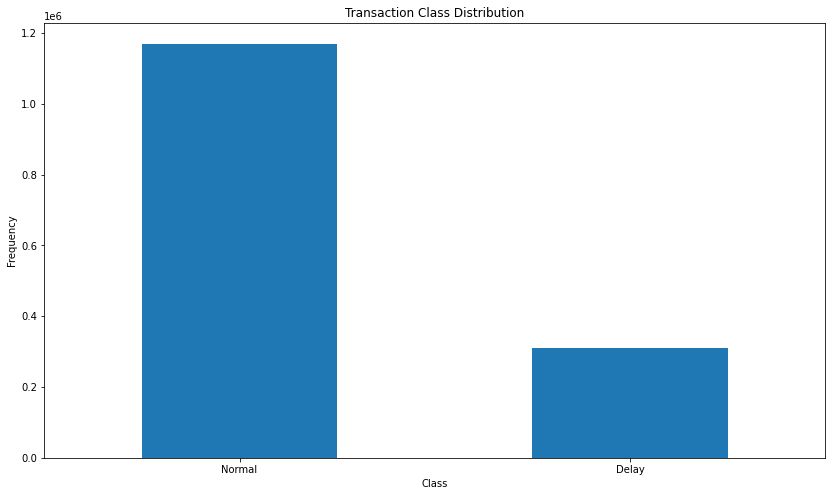

In [32]:
count_classes = pd.value_counts(labels_train, sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [33]:
## Get the delay and the normal dataset 
delay = data[data['ArrDel15']==1]
normal = data[data['ArrDel15']==0]
print(delay.shape,normal.shape)

(387635, 41) (1462525, 41)


In [34]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_rov,y_rov=smk.fit_sample(X,Y)

In [35]:
X_rov.shape,y_rov.shape

((2329434, 31), (2329434,))

In [39]:
p=pd.DataFrame(X_rov)
p

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,2129.000000,4.000000,10.000000,38.000000,0.0,0.000000,20.000000,12.000000,158.000000,353.000000,...,113.000000,0.000000,10.0,1012.000000,0.000000,58.000000,9.000000,79.000000,80.000000,44.000000
1,1800.000000,2.000000,3.000000,2102.000000,0.0,0.000000,0.000000,15.000000,351.000000,353.000000,...,113.000000,0.000000,10.0,1015.000000,0.000000,40.000000,13.000000,78.000000,77.000000,26.000000
2,824.000000,14.000000,10.000000,1649.000000,0.0,0.000000,17.000000,16.000000,322.000000,113.000000,...,266.000000,0.200000,4.0,1008.000000,91.000000,51.000000,8.000000,53.000000,51.000000,93.000000
3,700.000000,0.000000,13.000000,920.000000,1.0,17.000000,0.000000,9.000000,171.000000,122.000000,...,122.000000,0.000000,10.0,1013.000000,88.000000,54.000000,22.000000,62.000000,61.000000,75.000000
4,830.000000,14.000000,3.000000,1404.000000,0.0,0.000000,0.000000,6.000000,141.000000,122.000000,...,302.000000,4.400000,8.0,1010.000000,100.000000,51.000000,17.000000,54.000000,50.000000,91.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2329429,2037.471760,14.000000,13.000000,2244.516944,1.0,68.730232,56.426576,9.505648,27.483056,113.000000,...,115.258472,0.075282,10.0,1012.752824,49.281064,51.247176,14.011296,60.494352,60.494352,85.258472
2329430,1834.013343,13.644804,2.078933,2212.144522,1.0,72.565871,73.670927,8.394663,263.000000,113.000000,...,113.355196,0.000000,10.0,1019.197331,46.210111,42.565871,9.960534,48.315730,45.394663,80.381883
2329431,1819.811237,12.000000,7.000000,1821.627304,1.0,53.848989,56.995170,15.627304,191.778314,125.226516,...,113.000000,0.000000,10.0,1016.221686,0.740562,47.334943,8.594382,56.853820,56.853820,57.632134
2329432,1749.063613,7.501780,12.000000,1920.879896,1.0,42.936387,59.374555,6.749110,311.441729,113.000000,...,113.000000,0.000000,10.0,1009.936387,26.819845,70.752671,14.438168,79.752671,80.752671,63.318064


In [36]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_rov)))

Original dataset shape Counter({0.0: 1169918, 1.0: 310210})
Resampled dataset shape Counter({0.0: 1164717, 1.0: 1164717})


In [37]:
xrov=pd.DataFrame(X_rov)
yrov=pd.DataFrame(y_rov)
xrov.to_csv("X_rov.csv", index=False)
yrov.to_csv("y_rov.csv", index=True)

In [37]:
xrov=pd.DataFrame(X_rov)
yrov=pd.DataFrame(y_rov)
xrov.to_csv("X_reg_ov.csv", index=False)
yrov.to_csv("y_reg_ov.csv", index=True)